In [27]:
import numpy as np
import matplotlib.pyplot as plt
import ultranest
import read_beam_FEKO as rf
from ultranest.plot import cornerplot
%matplotlib notebook

In [2]:
o = rf.read_beam_FEKO('nominal.out',0)

 Frequency in Hz:               FREQ =    2.50000E+07

 Frequency in Hz:               FREQ =    2.60000E+07

 Frequency in Hz:               FREQ =    2.70000E+07

 Frequency in Hz:               FREQ =    2.80000E+07

 Frequency in Hz:               FREQ =    2.90000E+07

 Frequency in Hz:               FREQ =    3.00000E+07

 Frequency in Hz:               FREQ =    3.10000E+07

 Frequency in Hz:               FREQ =    3.20000E+07

 Frequency in Hz:               FREQ =    3.30000E+07

 Frequency in Hz:               FREQ =    3.40000E+07

 Frequency in Hz:               FREQ =    3.50000E+07

 Frequency in Hz:               FREQ =    3.60000E+07

 Frequency in Hz:               FREQ =    3.70000E+07

 Frequency in Hz:               FREQ =    3.80000E+07

 Frequency in Hz:               FREQ =    3.90000E+07

 Frequency in Hz:               FREQ =    4.00000E+07

 Frequency in Hz:               FREQ =    4.10000E+07

 Frequency in Hz:               FREQ =    4.20000E+07

 Frequency

In [3]:
theta = 90 - o[2]
phi = o[1]
freq = o[0]
gain = o[5]

In [4]:
theta, phi = np.meshgrid(theta, phi)

In [5]:
def Gaussian2D(A, sigx, sigy):
    return A * np.exp(-(np.sin(theta*np.pi/180)*np.cos(phi*np.pi/180))**2/2/sigx**2 - (np.sin(theta*np.pi/180)*np.sin(phi*np.pi/180))**2/2/sigy**2) 

In [6]:
# Define model to simulate data
def model1(paras):
    A, sigx, sigy = paras
    return Gaussian2D(A,sigx,sigy).T

<IPython.core.display.Javascript object>


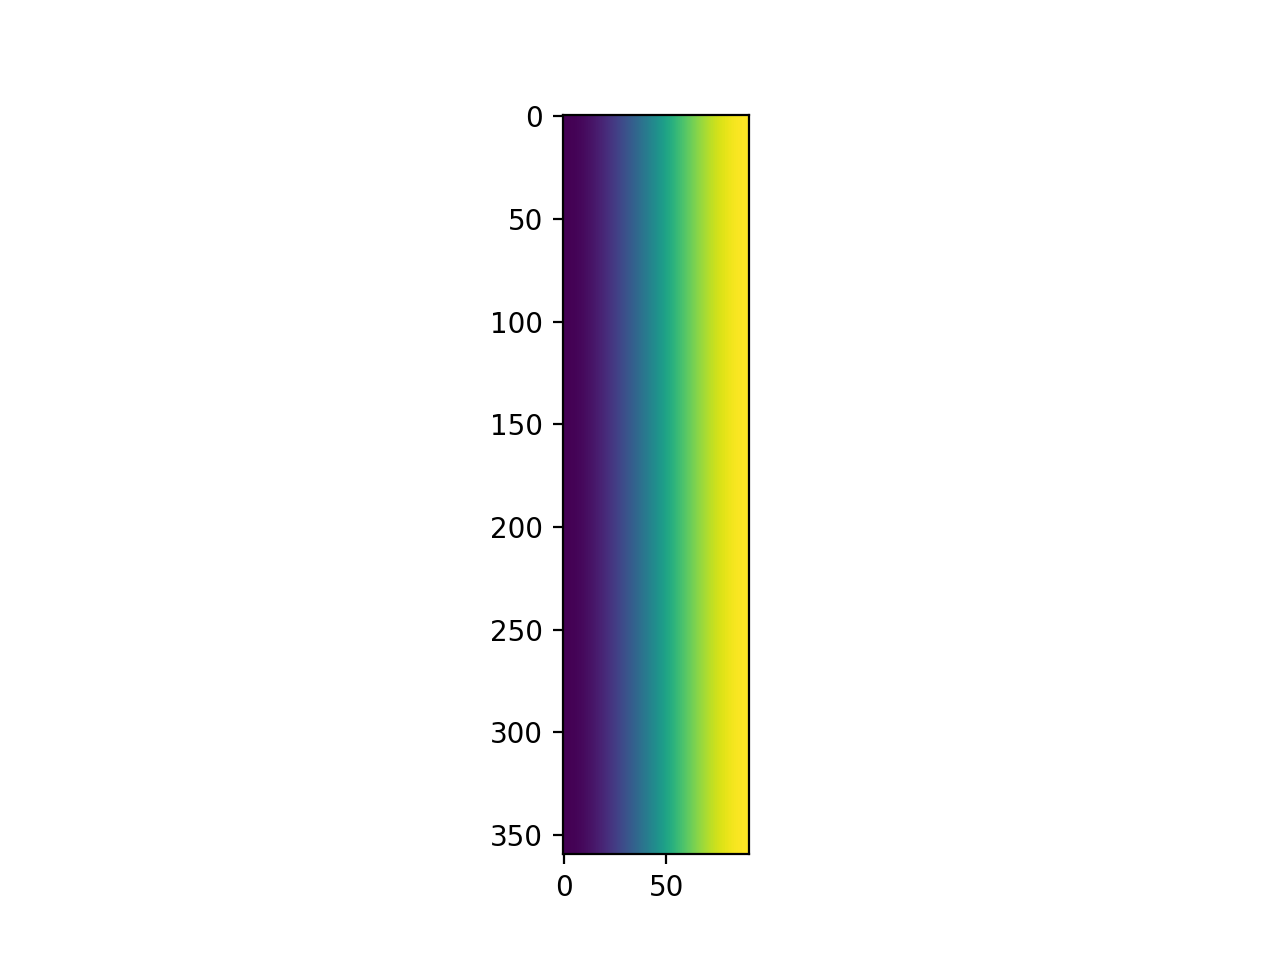

In [7]:
plt.imshow(Gaussian2D(1,20,20))

<IPython.core.display.Javascript object>


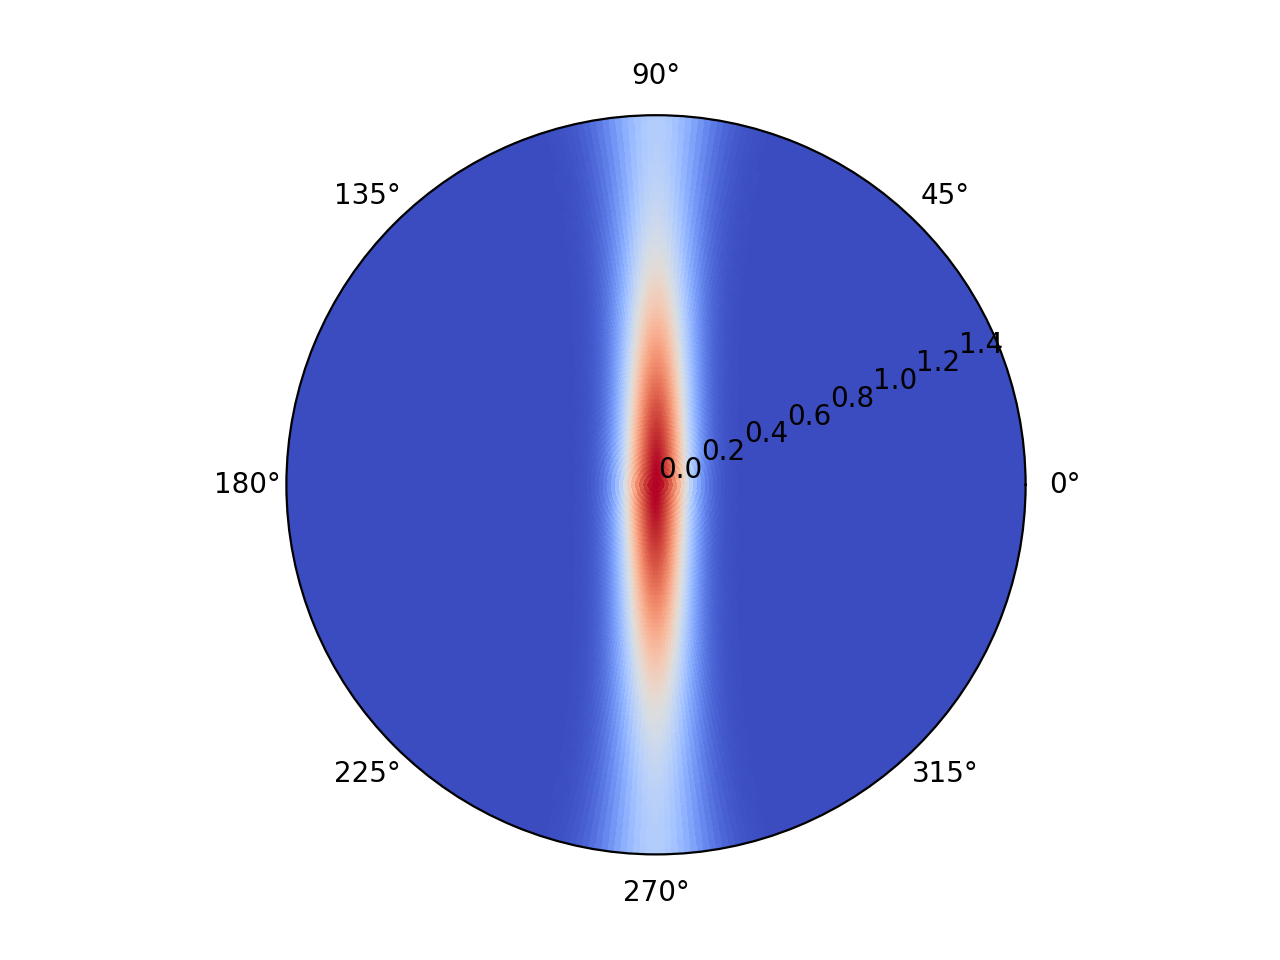

In [8]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,Gaussian2D(0.0003,0.1,0.7),cmap='coolwarm',shading='auto')

In [9]:
np.min(Gaussian2D(3,0.7,0.75)),np.max(Gaussian2D(3,0.7,0.75))

(1.0813433657934628, 3.0)

In [10]:
np.min(gain[0]),np.max(gain[0])

(1.0000230261160341e-100, 0.5236366068718123)

<IPython.core.display.Javascript object>


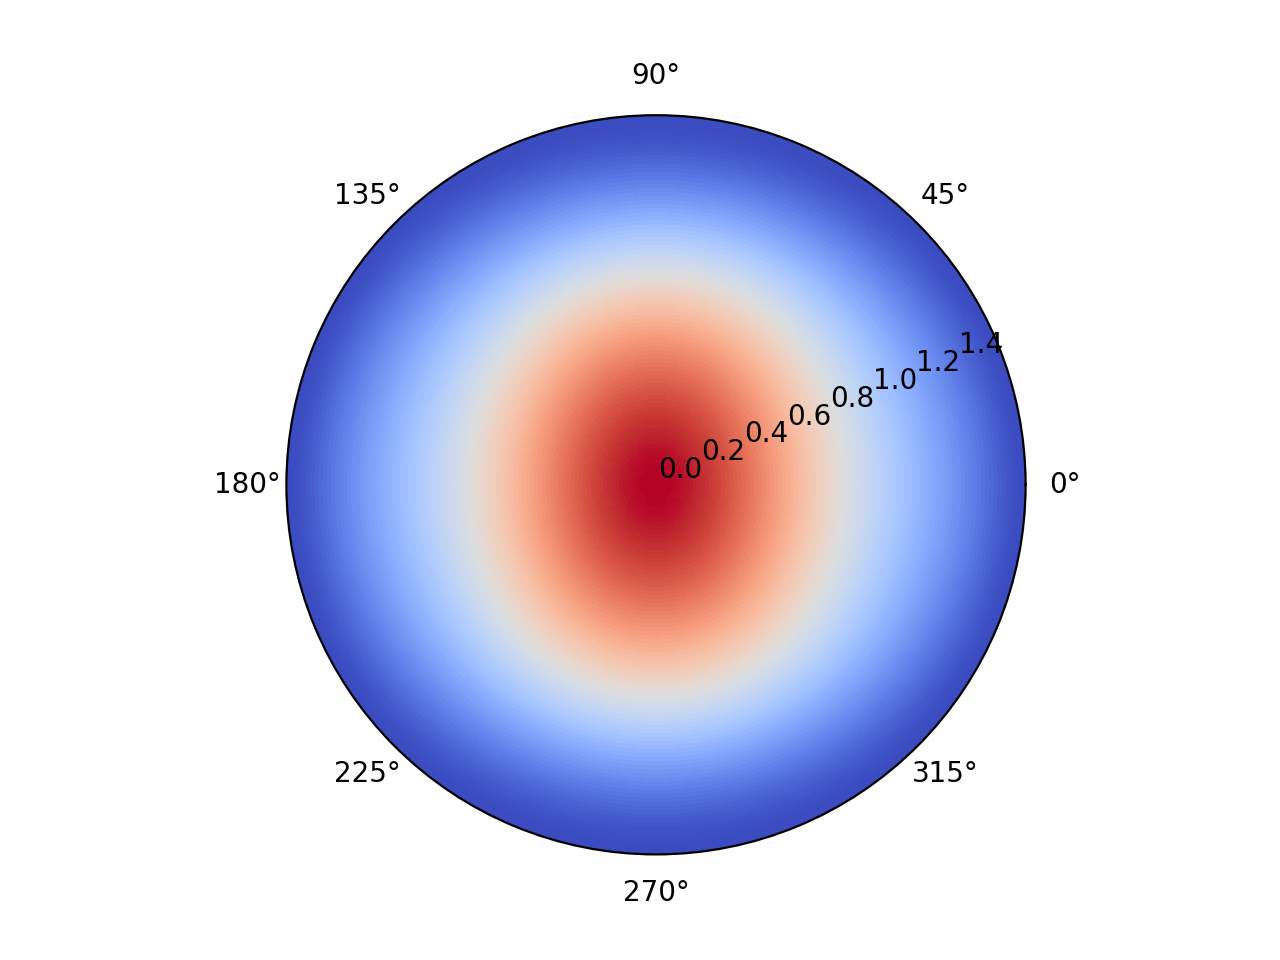

In [28]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[0].T,cmap='coolwarm',shading='auto')

In [29]:
sigma = np.std(gain[0])

In [30]:
param_names = ['A', 'sigx', 'sigy']
def my_prior_transform(cube):
    params = cube.copy()

    # transform location parameter: uniform prior
    lo = 0
    hi = 10
    params[0] = cube[0] * (hi - lo) + lo

    lo = 0
    hi = 2
    params[1] = cube[1] * (hi - lo) + lo

    lo = 0
    hi = 2
    params[1] = cube[1] * (hi - lo) + lo
    
    return params
def my_likelihood(params):
    mo = model1(params)
    diff = mo - gain[99]
    return -0.5 * np.sum((diff/sigma)**2)

In [31]:
sampler = ultranest.ReactiveNestedSampler(param_names, my_likelihood, my_prior_transform)

In [32]:
result = sampler.run(min_num_live_points=200)
sampler.print_results()

[ultranest] Sampling 200 live points from prior ...


[ultranest] Explored until L=-6e+04  -58389.05 [-58389.1083..-58389.1079]*| it/evals=5400/11097 eff=49.5549% N=200   0   
[ultranest] Likelihood function evaluations: 11110
[ultranest]   logZ = -5.841e+04 +- 0.2479
[ultranest] Effective samples strategy satisfied (ESS = 958.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 198 minimum live points (dlogz from 0.18 to 0.69, need <0.5)
[ultranest]   logZ error budget: single: 0.32 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest] done iterating.

logZ = -58411.530 +- 0.458
  single instance: logZ = -58411.530 +- 0.324
  bootstrapped   : logZ = -58411.539 +- 0.457
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 5.2771│ ▁ ▁▁▁▁▁▁▁▁▁▂▂▃▄▄▄▆▇▇▅▅▅▄▃▃▂▂▁▁▁▁▁▁▁▁▁ │5.2975    5.2878 +- 0.0025
    sigx                : 0.29262│ ▁ ▁▁▁▁▁▁▂▂▃▃▃▄▆▅▇▇▇▇▆▅▄▄▃▂▂▂▁▁▁▁▁▁

<IPython.core.display.Javascript object>


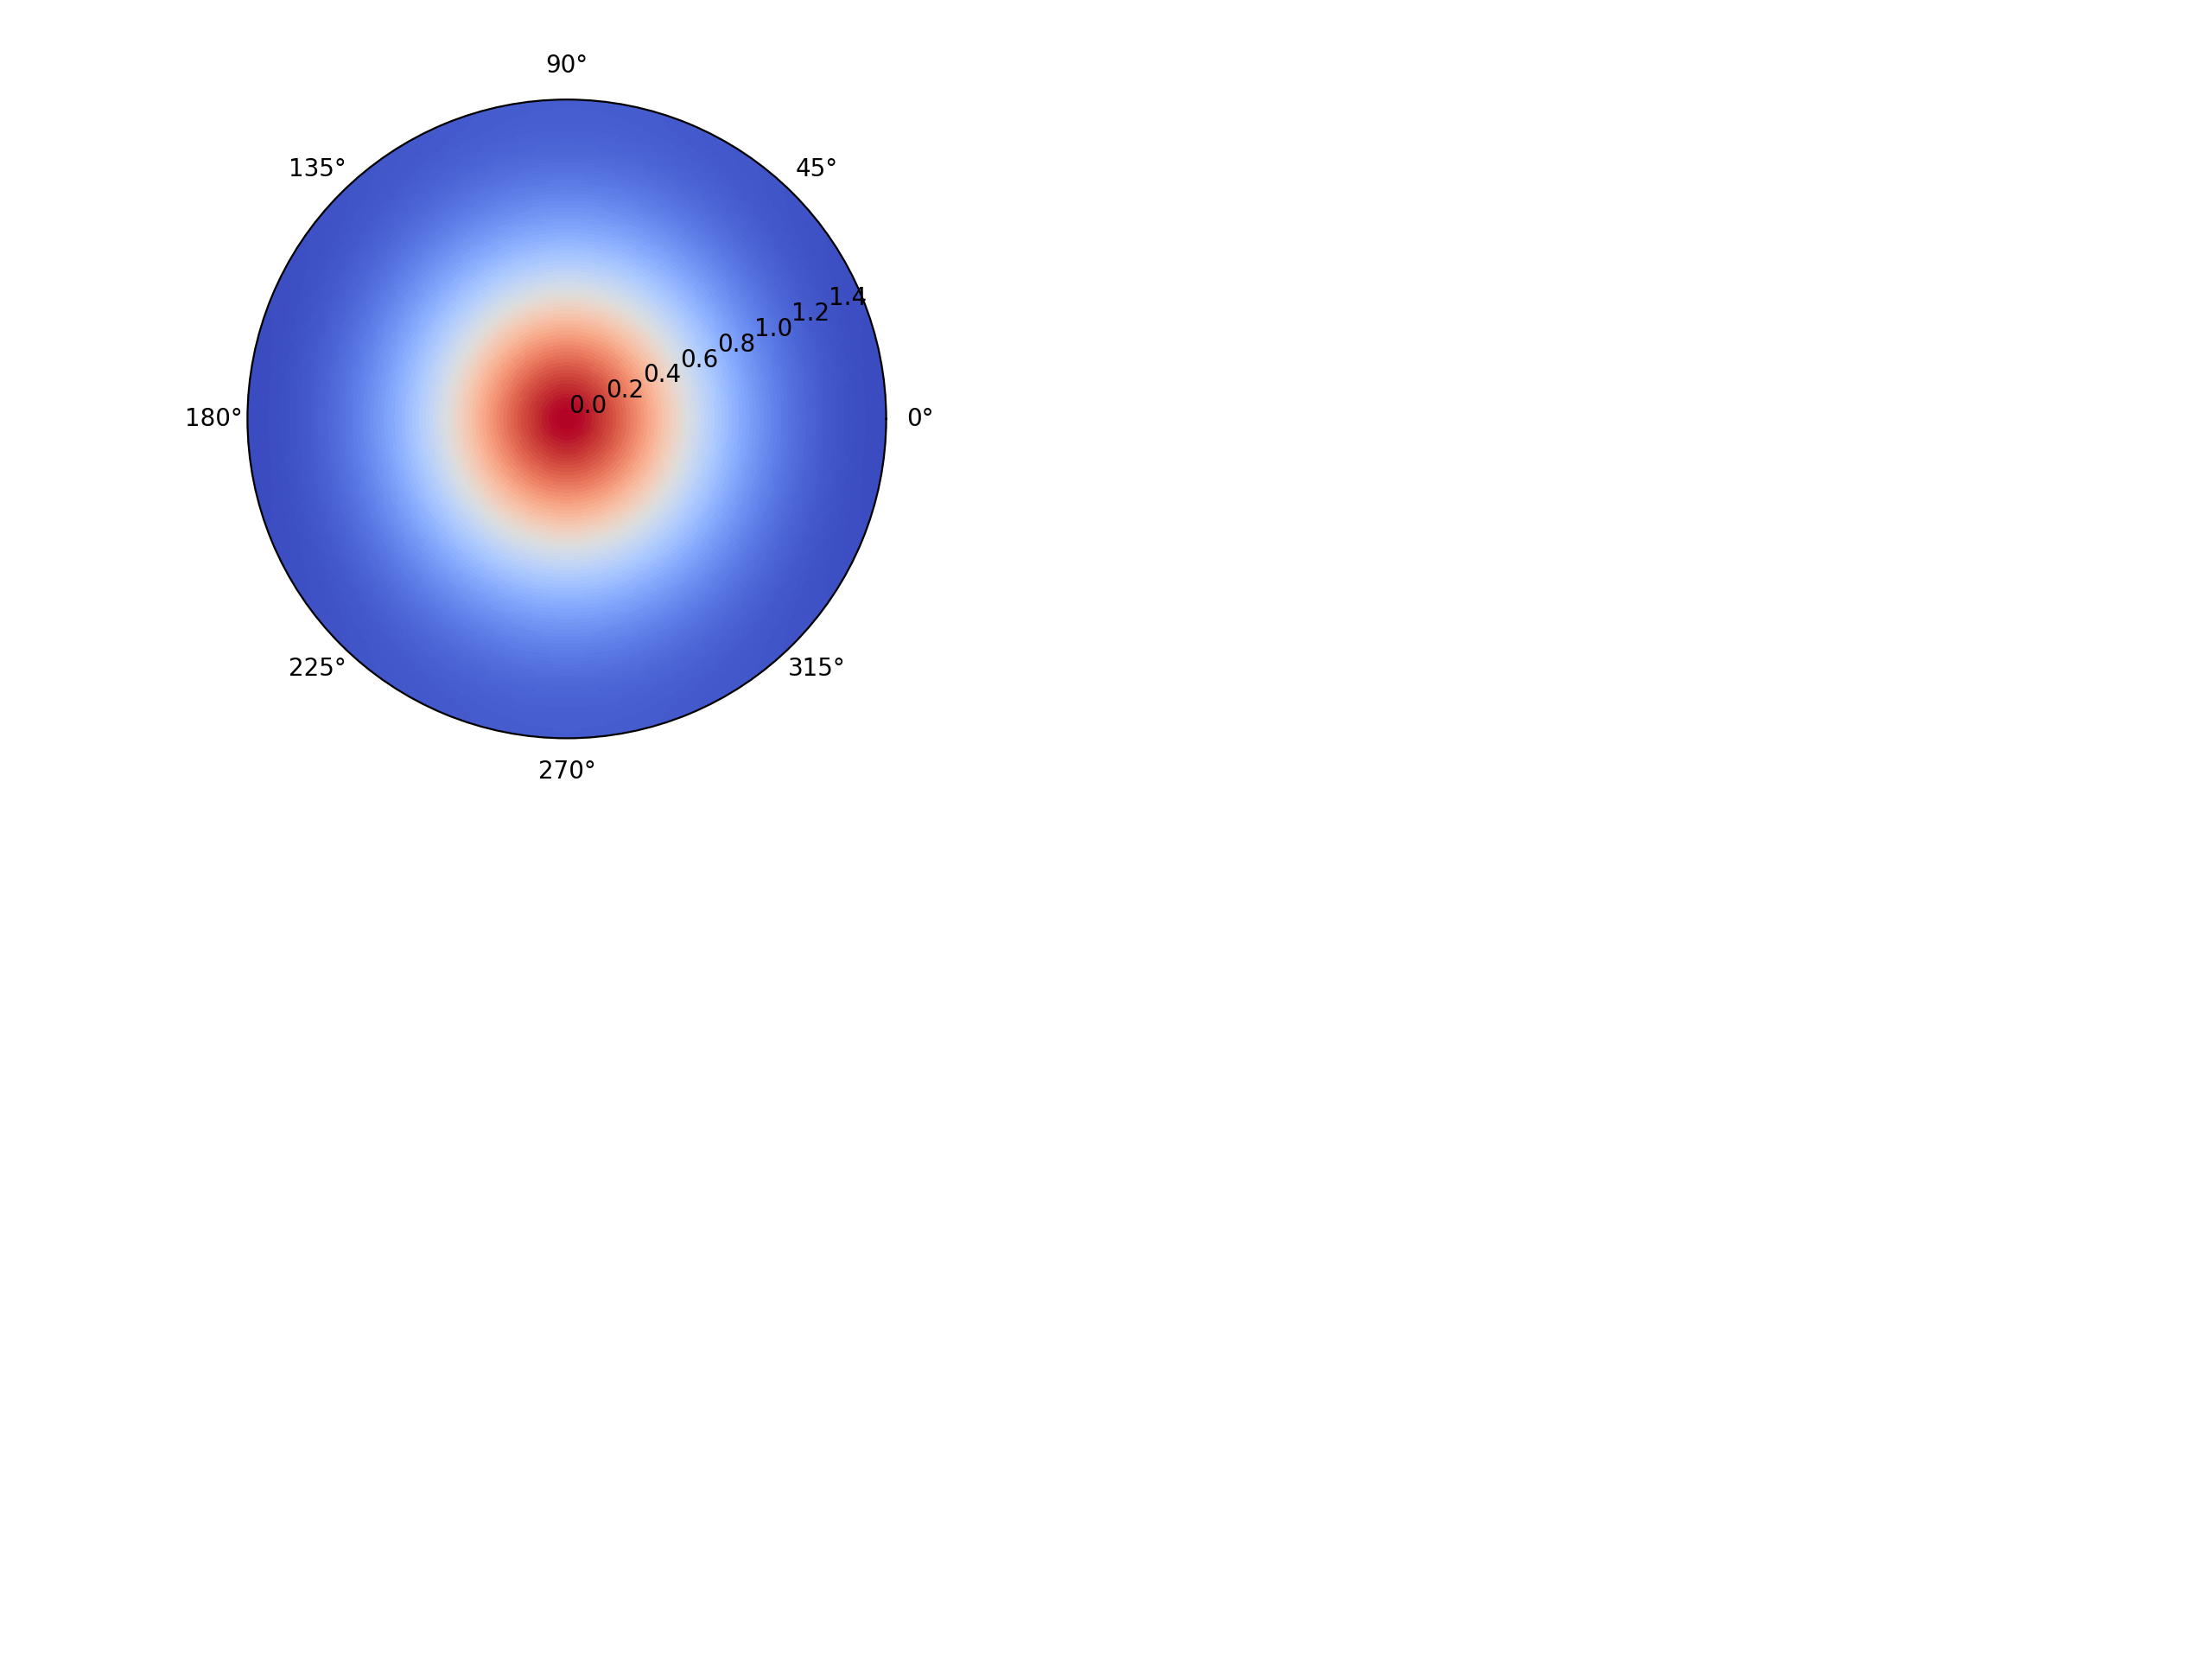

In [33]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,Gaussian2D(0.5624,0.5297,0.5578),cmap='coolwarm',shading='auto')

In [17]:
np.sqrt(0.6612*0.7029)/1.43

0.4767351310248787

<IPython.core.display.Javascript object>


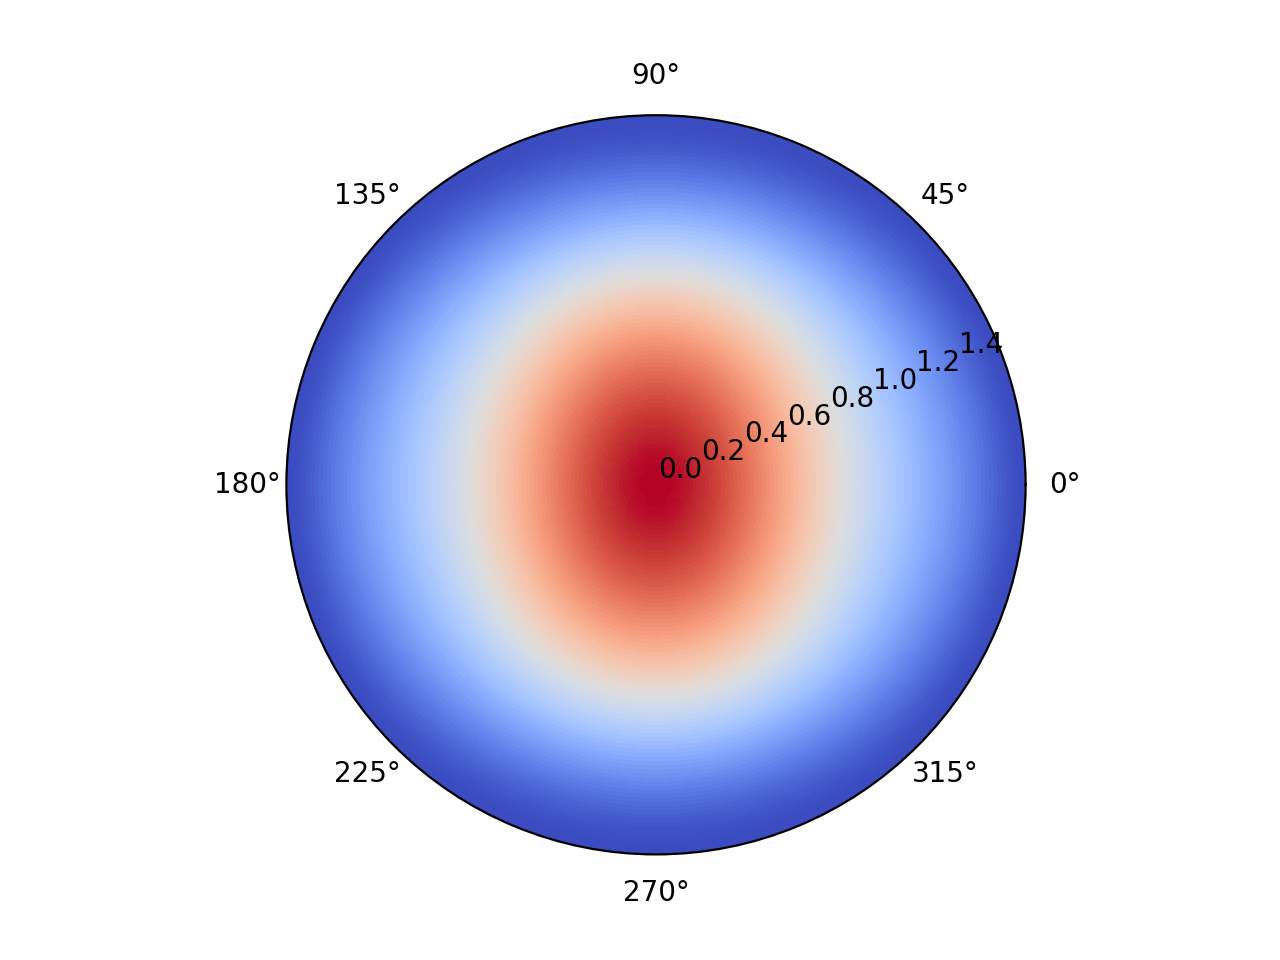

In [18]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[0].T,cmap='coolwarm',shading='auto')

In [19]:
residuals = (gain[0] - model1([0.5353,0.6612,0.7029])).T

<IPython.core.display.Javascript object>


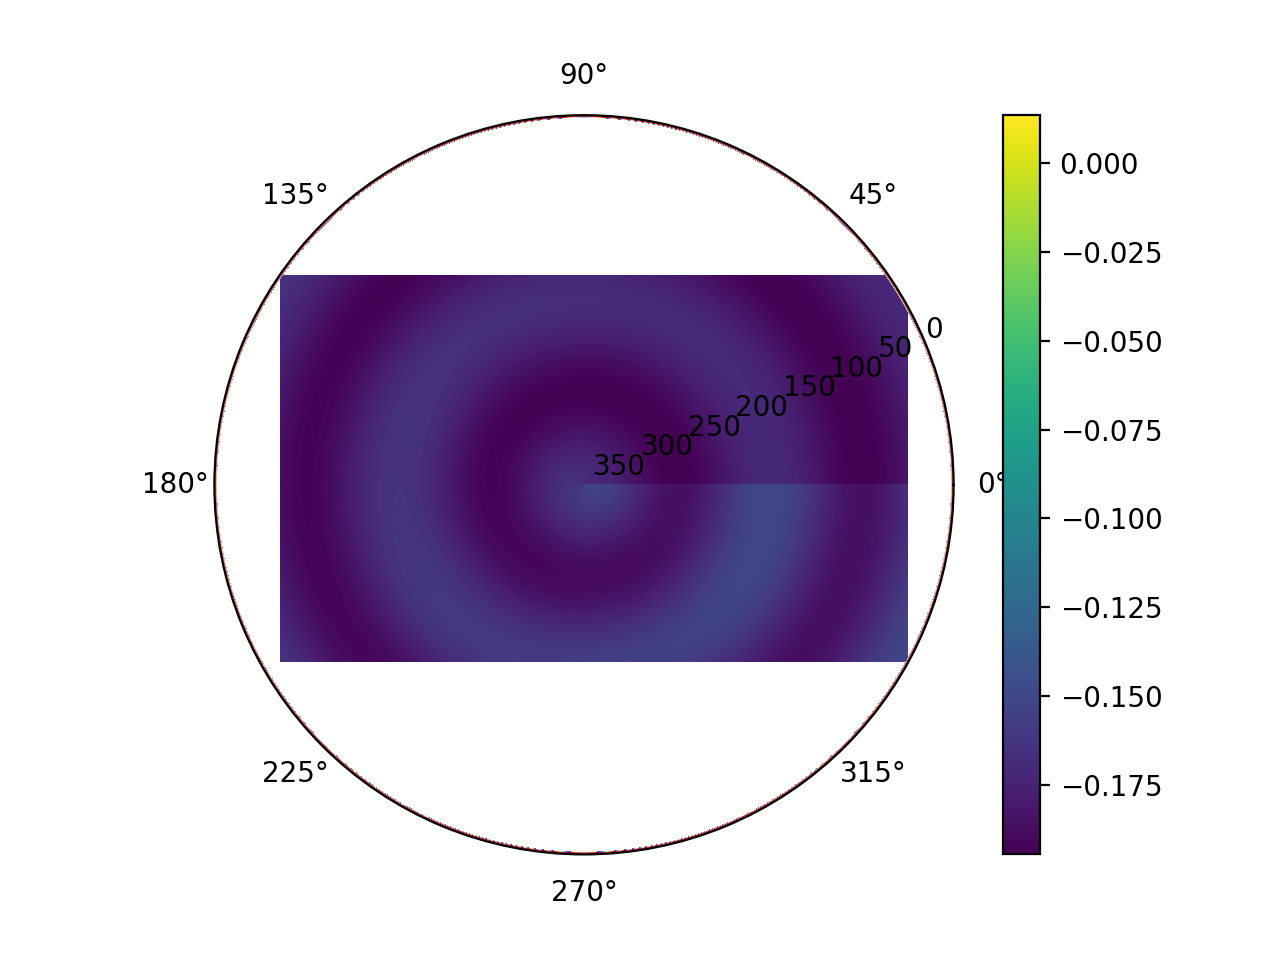

In [20]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')

In [21]:
np.pi/2

1.5707963267948966

In [22]:
plt.imshow(residuals)
plt.colorbar()

<IPython.core.display.Javascript object>


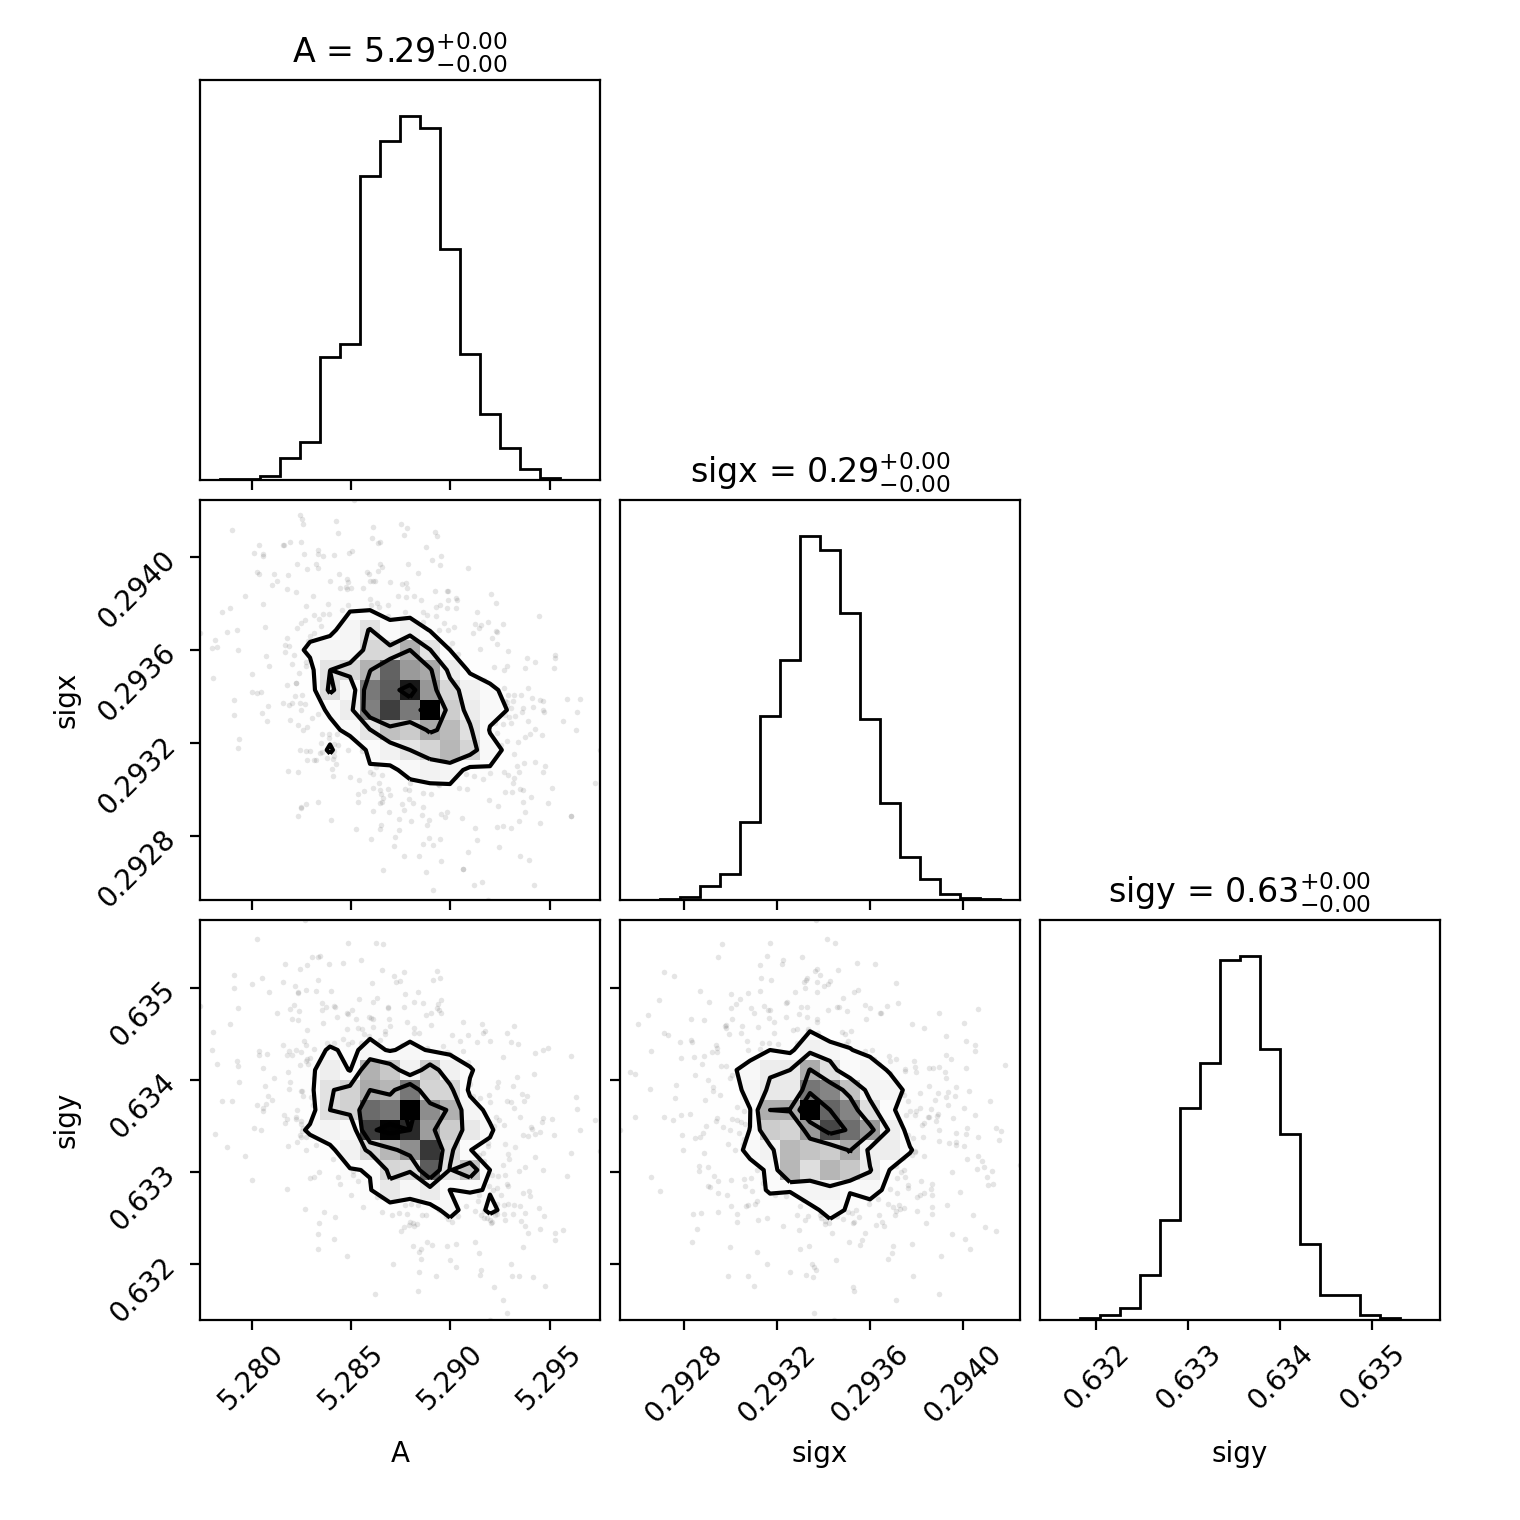

In [23]:
cornerplot(result)

In [34]:
xx = theta
yy = phi
sigma = np.sqrt(0.7*180/np.pi*0.66*180/np.pi)
#make sigma a input parameter
def Acos(R, theta, miu, nu):
    part1 = np.cos(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def Asin(R, theta, miu, nu):
    part1 = np.sin(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def P(miu,nu,u):
    terms = []
    p = 0
    while p <= nu:
        up = np.math.factorial(miu + nu)*np.math.factorial(nu)
        down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
        term = (-2)**(nu-p)* up/down * u[i][j]**p
        terms.append(term)
        p += 1
    print(terms)
    
def P(miu,nu,u):
    terms = []
    p = 0
    while p <= nu:
        up = np.math.factorial(miu + nu)*np.math.factorial(nu)
        down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
        term = (-2)**(nu-p)* up/down * u**p
        terms.append(term)
        p += 1
    terms = np.array(terms)
    return np.sum(terms,axis = 0)

#Normalization
def normalize(array):
    q = 0
    theta = 0
    while theta <= 90:
        for i in range(360):
            q += (array[theta*360 + i])**2 * (np.pi/180)**2 * np.sin(theta*np.pi/180)
        theta += 1
    return array/q

def TDH(rank):
    """return matrix A = [f1, f2, f3, ...] for rank 0 to rank TDH functions"""
    zz00c = Acos(xx, yy, 0, 0)
    zz00c2d = zz00c.flatten()
    array = normalize(zz00c2d)
    r = 1
    while r <= rank:
        m = 0
        while m <= r:
            if (r - m)%2 == 0:
                n = (r - m)/2
                if m == 0:
                    cosine = Acos(xx,yy,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    array = np.vstack((array, ncos))
                    m += 2
                else:
                    cosine = Acos(xx,yy,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    sine = Asin(xx,yy,m,n)
                    sine2d = sine.flatten()
                    nsin = normalize(sine2d)
                    array = np.vstack((array, ncos))
                    array = np.vstack((array, nsin))
                    m += 2
            else:
                m += 1
        r += 1
    matrix = np.matrix(array).T
    return matrix

def model(rank, coe):
    A = TDH(rank)
    a = np.matrix(coe).T
    return np.matmul(A,a)

def simulation(coe, sigma):
    rank = 0
    count = 1
    length = len(coe) - 1
    while length > count:
        rank += 1
        count += rank + 1
    mo = model(rank,coe)
    noise = np.random.default_rng().normal(0.0, sigma*np.max(mo),360*91)
    noi = np.matrix(noise).T
    data = mo + noi
    return data

def solve(A, data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    half = np.matmul(ATAinverse,AT)
    x = np.matmul(half,data)
    return x

def residual(A,data):
    x = solve(A, data)
    AT = A.T
    fittingmodel = np.matmul(A, x)
    r = data - fittingmodel
    return r

def residual2D(A,data):
    x = solve(A, data)
    AT = A.T
    fittingmodel = np.matmul(A, x)
    r = data - fittingmodel
    r2D = r.reshape(360,91)
    return r2D

def covariance(A,data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    r = residual(A,data)
    rT = r.T
    rTr = np.matmul(rT,r)
    s = rTr/((len(data))-10)
    s2 = s.item(0)
    covariance = s2*ATAinverse
    return covariance


In [35]:
xx.shape

(360, 91)

<IPython.core.display.Javascript object>


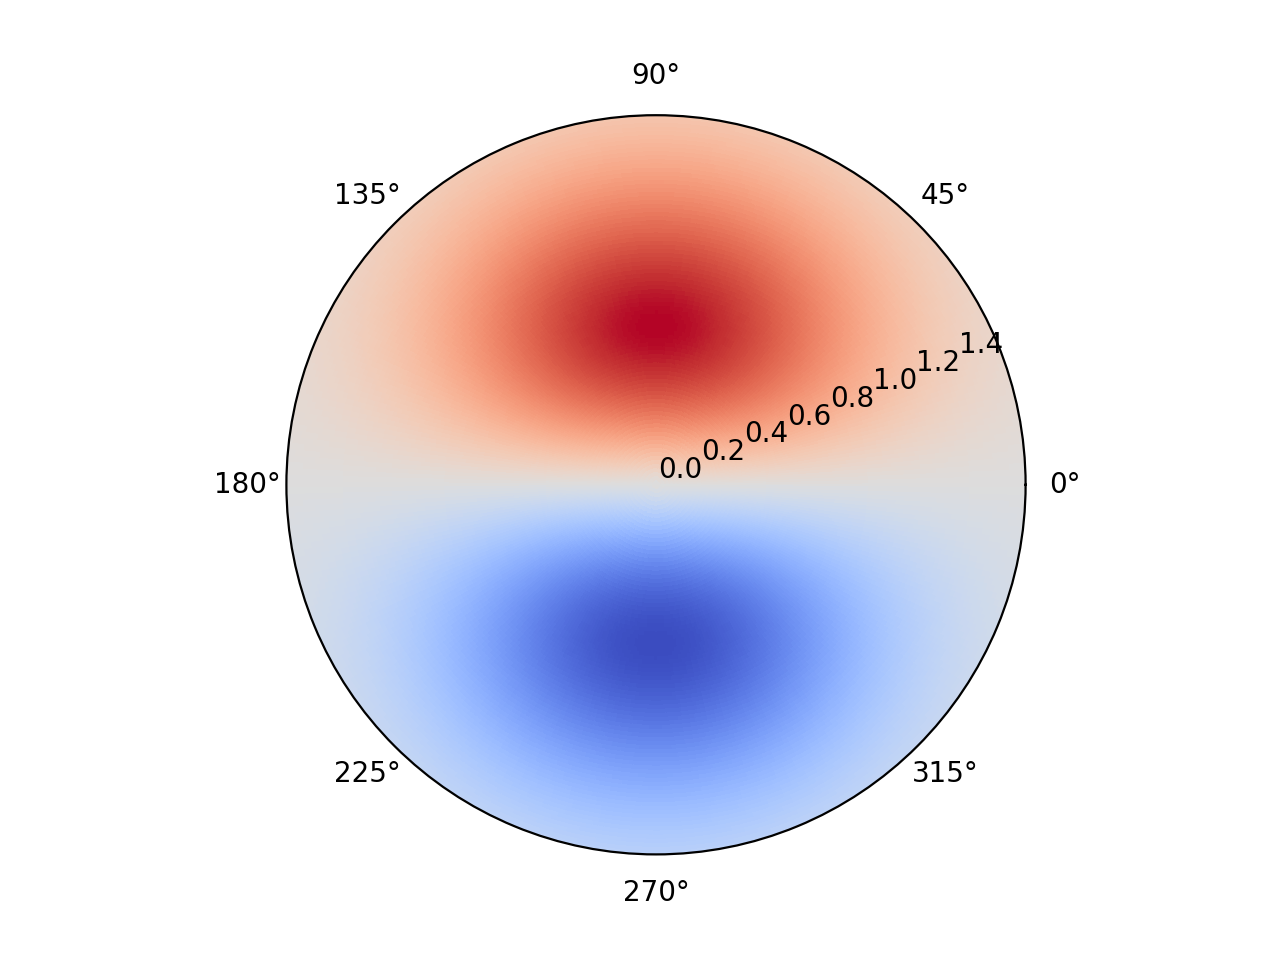

In [36]:
A = TDH(2)
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,A.T[2].T.reshape(360,91),cmap='coolwarm',shading='auto')

In [39]:
A = TDH(0)
resi = np.matrix(gain[0].flatten())
coe = solve(A,resi.T)
finalresi = residual2D(A,resi.T)
fittingmodel = np.matmul(A, coe)
fittingmodel2D = fittingmodel.reshape(360,91)

coe

matrix([[0.94108915]])

<IPython.core.display.Javascript object>


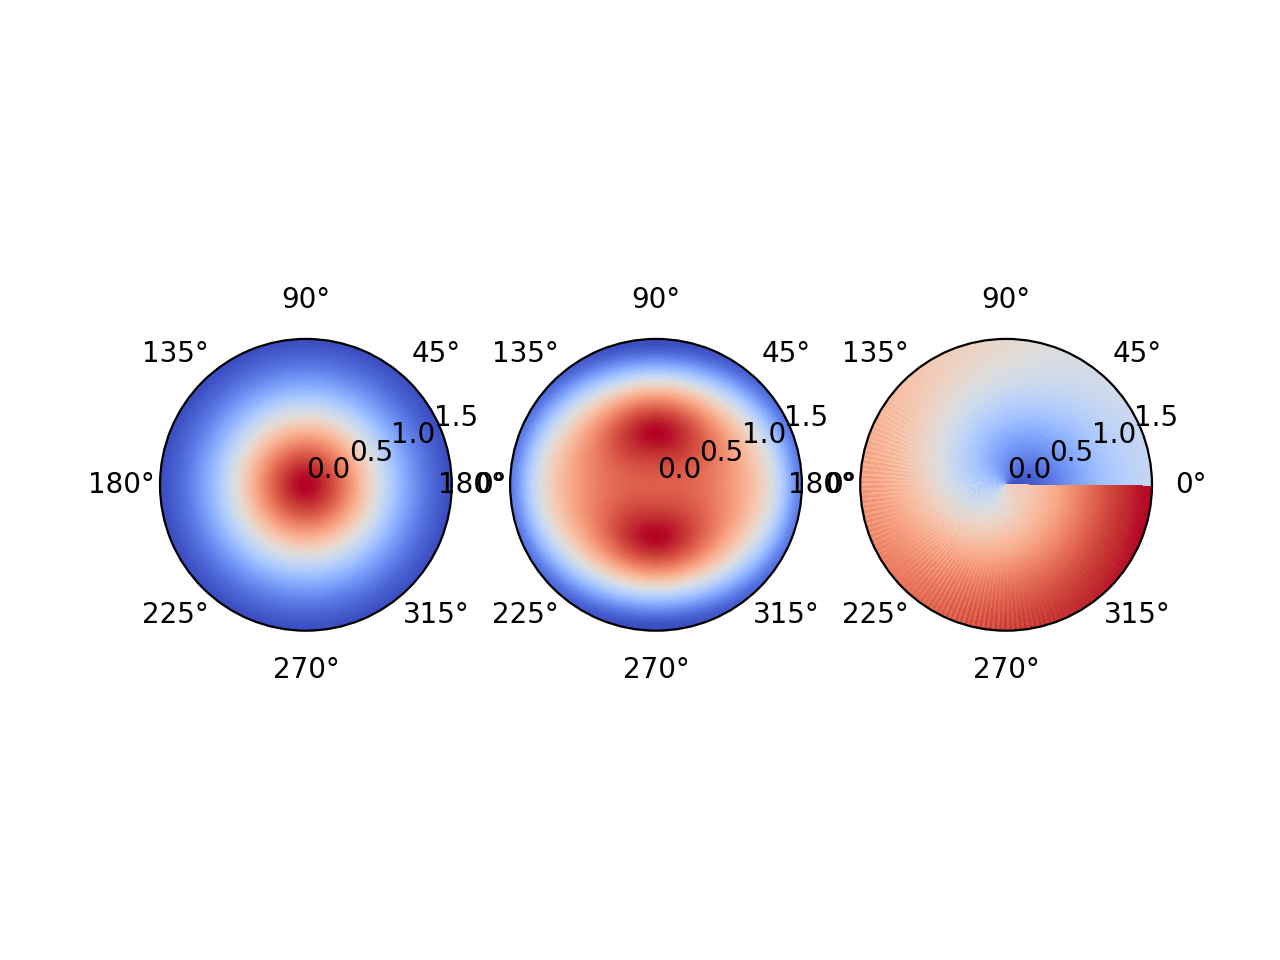

In [40]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')

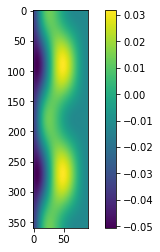

In [355]:
plt.imshow(finalresi)
plt.colorbar()

In [356]:
A = TDH(1)
resi = np.matrix(residuals.flatten())
coe = solve(A,resi.T)
finalresi = residual2D(A,resi.T)
fittingmodel = np.matmul(A, coe)
fittingmodel2D = fittingmodel.reshape(360,91)
coe

matrix([[ 1.81942757e-05],
        [-3.25356473e-05],
        [ 2.37435349e-06]])

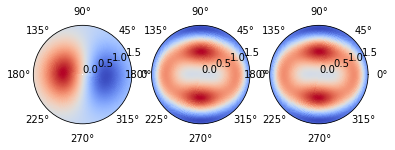

In [357]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')

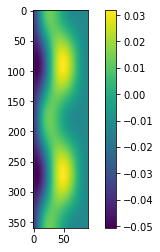

In [358]:
plt.imshow(finalresi)
plt.colorbar()

In [359]:
A = TDH(2)
resi = np.matrix(residuals.flatten())
coe = solve(A,resi.T)
finalresi = residual2D(A,resi.T)
fittingmodel = np.matmul(A, coe)
fittingmodel2D = fittingmodel.reshape(360,91)
coe

matrix([[ 1.62293240e-03],
        [-3.25356473e-05],
        [ 2.37435349e-06],
        [ 4.55452065e-03],
        [-2.45574751e-03],
        [-4.08330784e-06]])

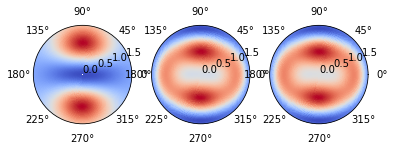

In [360]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')

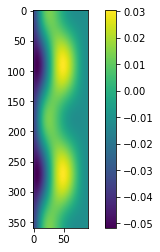

In [361]:
plt.imshow(finalresi)
plt.colorbar()

In [362]:
A = TDH(5)
resi = np.matrix(residuals.flatten())
coe = solve(A,resi.T)
finalresi = residual2D(A,resi.T)
fittingmodel = np.matmul(A, coe)
fittingmodel2D = fittingmodel.reshape(360,91)
coe

matrix([[ 7.32492252e-03],
        [-3.32715135e-05],
        [ 2.09792310e-06],
        [-1.21851813e-01],
        [ 2.02324339e-02],
        [-2.64753345e-06],
        [ 7.97852971e-06],
        [-2.00524896e-06],
        [ 4.51702229e-07],
        [-1.71591427e-07],
        [-5.83154938e-01],
        [ 1.28836351e-01],
        [ 8.15939413e-06],
        [-3.01312781e-03],
        [-1.00054419e-07],
        [ 9.92192392e-05],
        [-4.23622999e-06],
        [-2.96386447e-07],
        [ 7.42144105e-07],
        [ 2.35422890e-08],
        [ 1.48056995e-07]])

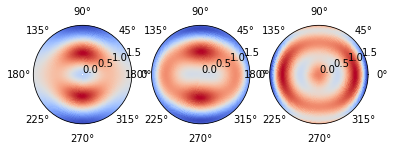

In [363]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')

In [364]:
np.max(gain[0])

0.5236366068718123

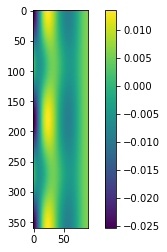

In [365]:
plt.imshow(finalresi)
plt.colorbar()

In [366]:
0.025/0.5

0.05

In [367]:
A = TDH(7)
resi = np.matrix(residuals.flatten())
coe = solve(A,resi.T)
finalresi = residual2D(A,resi.T)
fittingmodel = np.matmul(A, coe)
fittingmodel2D = fittingmodel.reshape(360,91)
coe

matrix([[-2.29243757e-03],
        [-3.07366573e-05],
        [ 2.13661795e-06],
        [-1.81917733e-01],
        [ 1.09952197e-02],
        [-2.73481779e-06],
        [ 3.00996003e-05],
        [-1.66760515e-06],
        [ 1.70429509e-07],
        [-8.51195563e-08],
        [-1.11744286e+00],
        [ 5.83710578e-02],
        [ 7.49304238e-06],
        [-4.91279541e-03],
        [-2.13100693e-07],
        [ 2.57711804e-04],
        [-1.81705379e-06],
        [-2.01297209e-06],
        [ 1.26980708e-06],
        [-1.64360938e-08],
        [ 3.31682603e-08],
        [-2.49027213e+00],
        [-3.71114567e-01],
        [-3.50966421e-06],
        [-9.16269122e-03],
        [-5.45407403e-07],
        [ 4.10659123e-04],
        [ 1.06516117e-06],
        [ 7.07727940e-04],
        [ 1.08021133e-05],
        [-8.90413584e-06],
        [ 2.73715712e-06],
        [-2.13144089e-07],
        [-6.12500326e-07],
        [-3.46143159e-06],
        [-7.42842926e-07]])

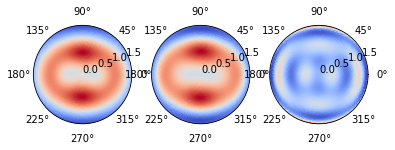

In [368]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')

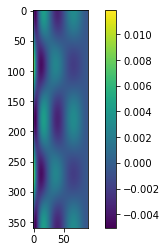

In [369]:
plt.imshow(finalresi)
plt.colorbar()

In [370]:
0.01/0.5

0.02

In [371]:
A = TDH(10)
A.shape

(32760, 66)

In [372]:
resi = np.matrix(residuals.flatten())
coe = solve(A,resi.T)

In [255]:
finalresi = residual2D(A,resi.T)

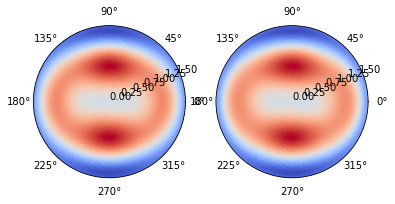

In [257]:
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')

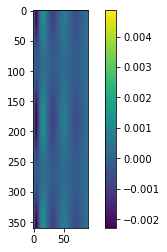

In [259]:
plt.imshow(finalresi)
plt.colorbar()

In [307]:
0.005/0.5

0.01

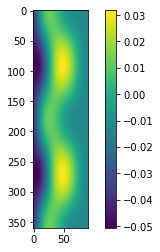

In [261]:
plt.imshow(residuals)
plt.colorbar()

In [291]:
B = TDH(15)

In [292]:
resi = np.matrix(residuals.flatten())
coe = solve(B,resi.T)
finalresi = residual2D(B,resi.T)
fittingmodel = np.matmul(B, coe)
fittingmodel2D = fittingmodel.reshape(360,91)

In [311]:
resi.shape

(1, 32760)

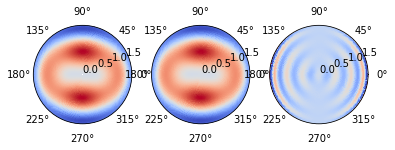

In [294]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,residuals,cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')

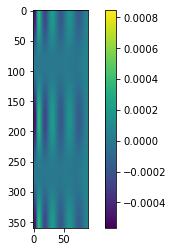

In [295]:
plt.imshow(finalresi)
plt.colorbar()

In [308]:
0.0008/0.5

0.0016

In [334]:
gain01d = gain[0].flatten()
coe = solve(TDH(0),np.matrix(gain01d).T)
coe

matrix([[0.94108915]])

In [345]:
finalresi = residual2D(TDH(0),np.matrix(gain01d).T)
fittingmodel = np.matmul(TDH(0), coe)
fittingmodel2D = fittingmodel.reshape(360,91)

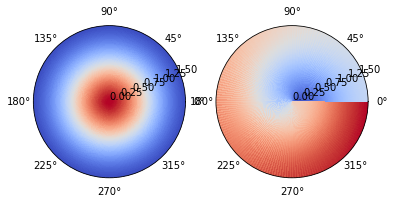

In [346]:
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection="polar"))
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodel2D,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,finalresi,cmap='coolwarm',shading='auto')

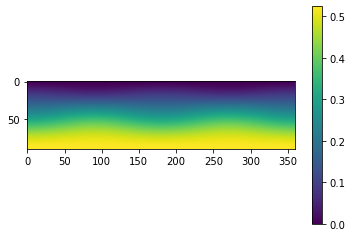

In [341]:
plt.imshow(gain[0])
plt.colorbar()

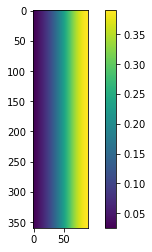

In [343]:
plt.imshow(fittingmodel.reshape(360,91))
plt.colorbar()

In [ ]:
# new graph 2D, x: coefficient number; y: value +- 1 sigma
# log plot, semi-y log plot
# plt.yscale("log")
# plot absolute number +- error bar(always positive, sqrt covarance diagnol)
# start with different plot
# one single plot at the end
# improve efficiency
# fit the gain[0]
# The percentage plot (Use rms for residual, divide by the peak of the gain, multiply by 100)
# Generate a large rank and slice to get the correct small rank matrix
# For loop for rank 